<a href="https://colab.research.google.com/github/RaphaelNotarantonio/DeepRL/blob/master/predseq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
eta=0.05

**2(a)**

In [0]:
def rand_weighted(P):
  M=len(P)
  return (np.random.choice(M,p=P)+1)

**2(b)**

In [0]:
def EWA_update(P,l):
  M=len(P)
  P2=np.zeros(M)
  for i in range(M):
    P2[i]=P[i]*np.exp(-eta*l[i]) 
  total=np.sum(P2)
  P2=P2/total
  return P2

**3,4**

In [0]:
#averagelossall=np.zeros((10,100)) #10 simulations of average loss evolution
#for iter in range(10):
M=3
p=np.full(3, 1/3)
#q=np.array([1/2,1/4,1/4]) #if adversary uses q weight constant
q=np.full(3, 1/3) #if adversary uses EWA
L=np.array([[0,-1,1],[1,0,-1],[-1,1,0]]) #loss matrix


possibl1=np.zeros(100) #init losses if i=1 always
possibl2=np.zeros(100) #init losses if i=2 always
possibl3=np.zeros(100) #init losses if i=3 always
losses=np.zeros(100)   #init losses if i given by EWA
l=0 #init loss at time t
regret=np.zeros(100) #init
memoirep=np.zeros((3,100)) #init list of p memorized

for t in range(1,101):
  i=rand_weighted(p) 
  j=rand_weighted(q)
  possibl1[t-1]=L[0,j-1] 
  possibl2[t-1]=L[1,j-1]
  possibl3[t-1]=L[2,j-1]
  l=L[i-1,j-1]
  losses[t-1]=l
  memoirep[:,t-1]=p
  p=EWA_update(p,np.array([possibl1[t-1],possibl2[t-1],possibl3[t-1]]))
  q=EWA_update(q,np.array([-L[i-1,0],-L[i-1,1],-L[i-1,2]])) #add this line only if q is given by EWA. careful: -L instead of L !

#calculate cumulative loss: real one (i given by EWA), and other possible ones (i=1, i=2, i=3..)
cumullosses=losses
for t in range(1,100):
  cumullosses[t]+=cumullosses[t-1]
  possibl1[t]+=possibl1[t-1]
  possibl2[t]+=possibl2[t-1]
  possibl3[t]+=possibl3[t-1]

#calculate regret
regret=np.zeros(100)
for t in range(100):
  regret[t]=cumullosses[t]-min(possibl1[t],possibl2[t],possibl3[t])

#calculate average loss
averageloss=losses
for t in range(100):
  averageloss[t]/=(t+1)

  #averagelossall[iter,:]=averageloss


**3b weight vector p evolution**

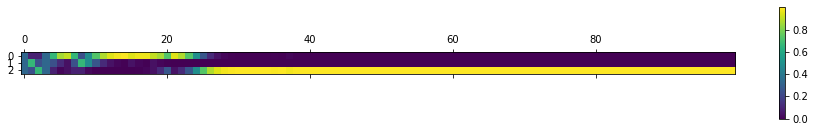

In [0]:
plt.matshow(memoirep)
plot.colorbar()
plt.show()



**3 c average loss**

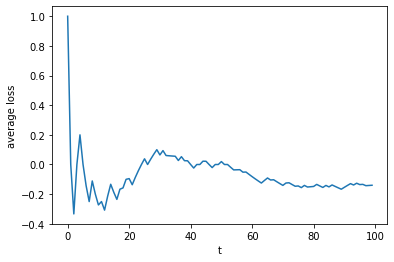

In [0]:
plt.xlabel('t')
plt.ylabel('average loss')
plt.plot(averageloss)
plt.show()

**3 d cumul regret**

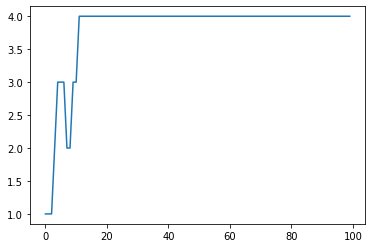

In [0]:
plt.plot(regret)
plt.show()

**3 e 10 simulations**

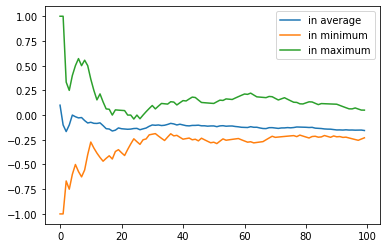

In [0]:
avavloss=np.zeros(100)
minavloss=np.zeros(100)
maxavloss=np.zeros(100)
for t in range(100):
  avavloss[t]=np.average(averagelossall[:,t])
  minavloss[t]=np.min(averagelossall[:,t])
  maxavloss[t]=np.max(averagelossall[:,t])
plt.plot(avavloss,label='in average')
plt.plot(minavloss, label='in minimum')
plt.plot(maxavloss, label='in maximum')
plt.legend()
plt.show()

**3 f eta simulations**

In [0]:
#finalregrets=np.zeros(5) #to be filled with different eta simulations

In [0]:
#finalregrets[4]=regret[99] #fill it with final regret

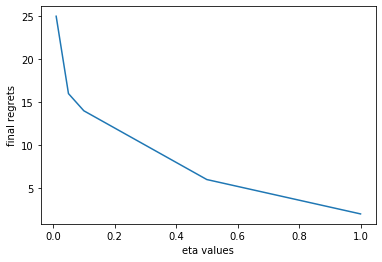

In [0]:
etas=np.array([0.01,0.05,0.1,0.5,1])
plt.plot(etas,finalregrets)
plt.xlabel('eta values')
plt.ylabel('final regrets')
plt.show()

**4 a**

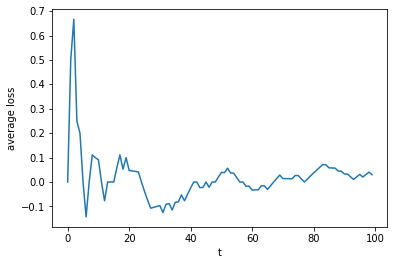

In [0]:
plt.xlabel('t')
plt.ylabel('average loss')
plt.plot(averageloss)
plt.show()

**4b**

In [0]:
#averagelossall=np.zeros((10,100)) #10 simulations of average loss evolution
#for iter in range(10):
M=3
p=np.full(3, 1/3)
#q=np.array([1/2,1/4,1/4]) #if adversary uses q weight constant
q=np.full(3, 1/3) #if adversary uses EWA
L=np.array([[0,-1,1],[1,0,-1],[-1,1,0]]) #loss matrix


possibl1=np.zeros(10000) #init losses if i=1 always
possibl2=np.zeros(10000) #init losses if i=2 always
possibl3=np.zeros(10000) #init losses if i=3 always
losses=np.zeros(10000)   #init losses if i given by EWA
l=0 #init loss at time t
regret=np.zeros(10000) #init
memoirep=np.zeros((3,10000)) #init list of p memorized

for t in range(1,10001):
  i=rand_weighted(p) 
  j=rand_weighted(q)
  possibl1[t-1]=L[0,j-1] 
  possibl2[t-1]=L[1,j-1]
  possibl3[t-1]=L[2,j-1]
  l=L[i-1,j-1]
  losses[t-1]=l
  memoirep[:,t-1]=p
  p=EWA_update(p,np.array([possibl1[t-1],possibl2[t-1],possibl3[t-1]]))
  q=EWA_update(q,np.array([-L[i-1,0],-L[i-1,1],-L[i-1,2]])) #add this line only if q is given by EWA. careful: -L instead of L !

#calculate cumulative loss: real one (i given by EWA), and other possible ones (i=1, i=2, i=3..)
cumullosses=losses
for t in range(1,10000):
  cumullosses[t]+=cumullosses[t-1]
  possibl1[t]+=possibl1[t-1]
  possibl2[t]+=possibl2[t-1]
  possibl3[t]+=possibl3[t-1]

#calculate regret
regret=np.zeros(10000)
for t in range(10000):
  regret[t]=cumullosses[t]-min(possibl1[t],possibl2[t],possibl3[t])

#calculate average loss
averageloss=losses
for t in range(10000):
  averageloss[t]/=(t+1)

  #averagelossall[iter,:]=averageloss


In [0]:
for t in range(1,10000):
  memoirep[:,t]+=memoirep[:,t-1]
for t in range(10000):
  memoirep[:,t]/=(t+1)
distance=np.zeros(10000)
for t in range(10000):
  distance[t]=np.linalg.norm(memoirep[:,t]-np.array([1/3,1/3,1/3]))

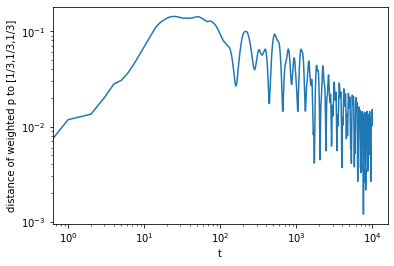

In [0]:
plt.xlabel('t')
plt.ylabel('distance of weighted p to [1/3,1/3,1/3]')
plt.loglog(distance)
plt.show()

**Bandit**

**5a**

In [0]:
def estimated_loss(i,L):
  l=np.zeros(M)
  l[i-1]=L 
  return l


In [0]:
def EXP3_update(P,i,L):
  M=len(P)
  P2=np.zeros(M)
  P2=P*np.exp(-eta*estimated_loss(i,L))
  P2=P2/np.sum(P2)
  return P2

In [0]:
#averagelossall=np.zeros((10,100)) #10 simulations of average loss evolution
#for iter in range(10):
M=3
p=np.full(3, 1/3)
#q=np.array([1/2,1/4,1/4]) #if adversary uses q weight constant
q=np.full(3, 1/3) #if adversary uses EXP3
L=np.array([[0,-1,1],[1,0,-1],[-1,1,0]]) #loss matrix


possibl1=np.zeros(100) #init losses if i=1 always
possibl2=np.zeros(100) #init losses if i=2 always
possibl3=np.zeros(100) #init losses if i=3 always
losses=np.zeros(100)   #init losses if i given by EXP3
l=0 #init loss at time t
regret=np.zeros(100) #init
memoirep=np.zeros((3,100)) #init list of p memorized

w=np.ones(M)
x=np.zeros(M)
v=np.ones(M)
y=np.zeros(M)
for t in range(1,101):
  i=rand_weighted(p) 
  j=rand_weighted(q)
  possibl1[t-1]=L[0,j-1] 
  possibl2[t-1]=L[1,j-1]
  possibl3[t-1]=L[2,j-1]
  l=L[i-1,j-1]
  losses[t-1]=l
  memoirep[:,t-1]=p
  for k in range(M):
    if i-1==k:
      x[k]=l/p[k]
    else:
      x[k]=0
  w=w*np.exp(-eta*x)
  p=w/np.sum(w)

  #add these lines only if q is given by EXP3. 
  for k in range(M):
    if j-1==k:
      y[k]=-l/q[k]
    else:
      y[k]=0
  v=v*np.exp(-eta*y)
  q=v/np.sum(v)


#calculate cumulative loss: real one (i given by EXP3), and other possible ones (i=1, i=2, i=3..)
cumullosses=losses
for t in range(1,100):
  cumullosses[t]+=cumullosses[t-1]
  possibl1[t]+=possibl1[t-1]
  possibl2[t]+=possibl2[t-1]
  possibl3[t]+=possibl3[t-1]

#calculate regret
regret=np.zeros(100)
for t in range(100):
  regret[t]=cumullosses[t]-min(possibl1[t],possibl2[t],possibl3[t])

#calculate average loss
averageloss=losses
for t in range(100):
  averageloss[t]/=(t+1)

  #averagelossall[iter,:]=averageloss


6 **b**

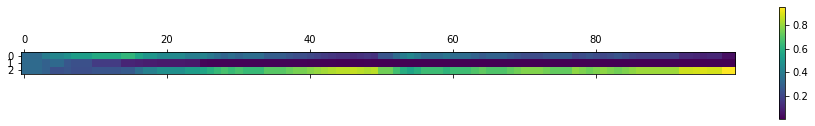

In [12]:
plt.matshow(memoirep)
plt.colorbar()
plt.show()

**6 c**

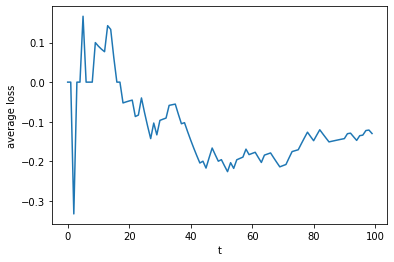

In [13]:
plt.xlabel('t')
plt.ylabel('average loss')
plt.plot(averageloss)
plt.show()

**6d**

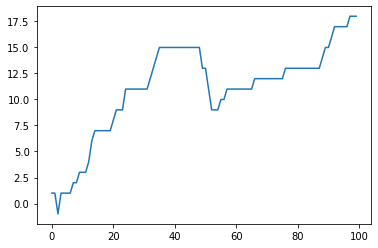

In [14]:
plt.plot(regret)
plt.show()

**6e**

In [0]:
eta=0.01

In [0]:
averagelossall=np.zeros((10,100)) #10 simulations of average loss evolution
for iter in range(10):
  M=3
  p=np.full(3, 1/3)
  q=np.array([1/2,1/4,1/4]) #if adversary uses q weight constant
  #q=np.full(3, 1/3) #if adversary uses EXP3
  L=np.array([[0,-1,1],[1,0,-1],[-1,1,0]]) #loss matrix


  possibl1=np.zeros(100) #init losses if i=1 always
  possibl2=np.zeros(100) #init losses if i=2 always
  possibl3=np.zeros(100) #init losses if i=3 always
  losses=np.zeros(100)   #init losses if i given by EXP3
  l=0 #init loss at time t
  regret=np.zeros(100) #init
  memoirep=np.zeros((3,100)) #init list of p memorized

  w=np.ones(M)
  x=np.zeros(M)
  v=np.ones(M)
  y=np.zeros(M)
  for t in range(1,101):
    i=rand_weighted(p) 
    j=rand_weighted(q)
    possibl1[t-1]=L[0,j-1] 
    possibl2[t-1]=L[1,j-1]
    possibl3[t-1]=L[2,j-1]
    l=L[i-1,j-1]
    losses[t-1]=l
    memoirep[:,t-1]=p
    for k in range(M):
      if i-1==k:
        x[k]=l/p[k]
      else:
        x[k]=0
    w=w*np.exp(-eta*x)
    p=w/np.sum(w)

    #add these lines only if q is given by EXP3. 
    #for k in range(M):
    #  if j-1=k:
    #    y[k]=-l/q[k]
    #  else:
    #    y[k]=0
    #v=v*np.exp(-eta*y)
    #q=v/np.sum(v)


  #calculate cumulative loss: real one (i given by EXP3), and other possible ones (i=1, i=2, i=3..)
  cumullosses=losses
  for t in range(1,100):
    cumullosses[t]+=cumullosses[t-1]
    possibl1[t]+=possibl1[t-1]
    possibl2[t]+=possibl2[t-1]
    possibl3[t]+=possibl3[t-1]

  #calculate regret
  regret=np.zeros(100)
  for t in range(100):
    regret[t]=cumullosses[t]-min(possibl1[t],possibl2[t],possibl3[t])

  #calculate average loss
  averageloss=losses
  for t in range(100):
    averageloss[t]/=(t+1)

  averagelossall[iter,:]=averageloss


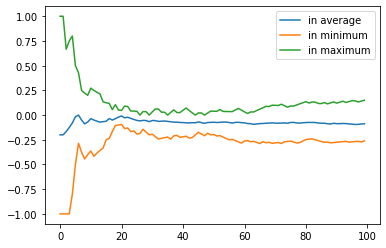

In [17]:
avavloss=np.zeros(100)
minavloss=np.zeros(100)
maxavloss=np.zeros(100)
for t in range(100):
  avavloss[t]=np.average(averagelossall[:,t])
  minavloss[t]=np.min(averagelossall[:,t])
  maxavloss[t]=np.max(averagelossall[:,t])
plt.plot(avavloss,label='in average')
plt.plot(minavloss, label='in minimum')
plt.plot(maxavloss, label='in maximum')
plt.legend()
plt.show()

**6f**

In [0]:
finalregrets=np.zeros(5) #to be filled with different eta simulations

In [0]:
finalregrets[4]=regret[99] #fill it with final regret

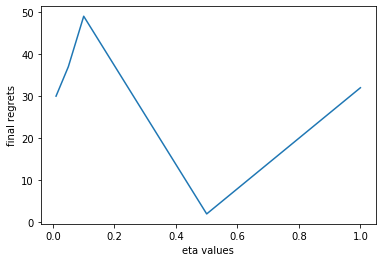

In [34]:
etas=np.array([0.01,0.05,0.1,0.5,1])
plt.plot(etas,finalregrets)
plt.xlabel('eta values')
plt.ylabel('final regrets')
plt.show()

**7a**

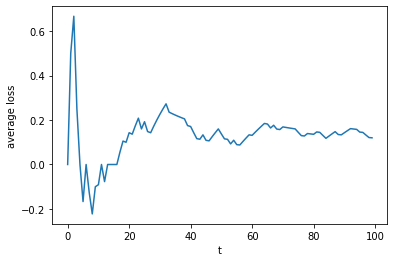

In [39]:
plt.xlabel('t')
plt.ylabel('average loss')
plt.plot(averageloss)
plt.show()

**7b**

In [0]:
#averagelossall=np.zeros((10,100)) #10 simulations of average loss evolution
#for iter in range(10):
M=3
p=np.full(3, 1/3)
#q=np.array([1/2,1/4,1/4]) #if adversary uses q weight constant
q=np.full(3, 1/3) #if adversary uses EXP3
L=np.array([[0,-1,1],[1,0,-1],[-1,1,0]]) #loss matrix


possibl1=np.zeros(10000) #init losses if i=1 always
possibl2=np.zeros(10000) #init losses if i=2 always
possibl3=np.zeros(10000) #init losses if i=3 always
losses=np.zeros(10000)   #init losses if i given by EWA
l=0 #init loss at time t
regret=np.zeros(10000) #init
memoirep=np.zeros((3,10000)) #init list of p memorized

w=np.ones(M)
x=np.zeros(M)
v=np.ones(M)
y=np.zeros(M)
for t in range(1,10001):
  i=rand_weighted(p) 
  j=rand_weighted(q)
  possibl1[t-1]=L[0,j-1] 
  possibl2[t-1]=L[1,j-1]
  possibl3[t-1]=L[2,j-1]
  l=L[i-1,j-1]
  losses[t-1]=l
  memoirep[:,t-1]=p
  for k in range(M):
    if i-1==k:
      x[k]=l/p[k]
    else:
      x[k]=0
  w=w*np.exp(-eta*x)
  p=b/M + (1-b)*w/np.sum(w)

  #add these lines only if q is given by EXP3. 
  for k in range(M):
    if j-1==k:
      y[k]=-l/q[k]
    else:
      y[k]=0
  v=v*np.exp(-eta*y)
  q=b/M + (1-b)*v/np.sum(v)


#calculate cumulative loss: real one (i given by EXP3), and other possible ones (i=1, i=2, i=3..)
cumullosses=losses
for t in range(1,10000):
  cumullosses[t]+=cumullosses[t-1]
  possibl1[t]+=possibl1[t-1]
  possibl2[t]+=possibl2[t-1]
  possibl3[t]+=possibl3[t-1]

#calculate regret
regret=np.zeros(10000)
for t in range(10000):
  regret[t]=cumullosses[t]-min(possibl1[t],possibl2[t],possibl3[t])

#calculate average loss
averageloss=losses
for t in range(10000):
  averageloss[t]/=(t+1)

  #averagelossall[iter,:]=averageloss

In [0]:
for t in range(1,10000):
  memoirep[:,t]+=memoirep[:,t-1]
for t in range(10000):
  memoirep[:,t]/=(t+1)
distance=np.zeros(10000)
for t in range(10000):
  distance[t]=np.linalg.norm(memoirep[:,t]-np.array([1/3,1/3,1/3]))

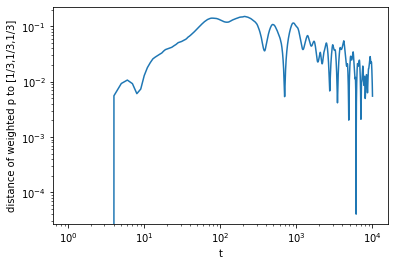

In [42]:
plt.xlabel('t')
plt.ylabel('distance of weighted p to [1/3,1/3,1/3]')
plt.loglog(distance)
plt.show()

**8**

In [0]:
eta=0.5

In [0]:
#averagelossall=np.zeros((10,100)) #10 simulations of average loss evolution
#for iter in range(10):
M=3
p=np.full(3, 1/3)
q=np.zeros(3) #init (not significant) 
L=np.array([[0,-1,1],[1,0,-1],[-1,1,0]]) #loss matrix


possibl1=np.zeros(100) #init losses if i=1 always
possibl2=np.zeros(100) #init losses if i=2 always
possibl3=np.zeros(100) #init losses if i=3 always
losses=np.zeros(100)   #init losses if i given by EWA
l=0 #init loss at time t
regret=np.zeros(10000) #init
memoirep=np.zeros((3,100)) #init list of p memorized

w=np.ones(M)
x=np.zeros(M)
N=np.zeros(M) #number of times adversary plays j=1, or 2, or 3..
S=np.zeros(M) #number of reward for adversary for each j
for t in range(1,101):
  i=rand_weighted(p) 
  if t==1:
    j=1
  if t==2:
    j=2
  if t==3:
    j=3
  if t>3:
    j=np.argmax(q)+1
  possibl1[t-1]=L[0,j-1] 
  possibl2[t-1]=L[1,j-1]
  possibl3[t-1]=L[2,j-1]
  l=L[i-1,j-1]
  losses[t-1]=l
  memoirep[:,t-1]=p
  for k in range(M):
    if i-1==k:
      x[k]=l/p[k]
    else:
      x[k]=0
  w=w*np.exp(-eta*x)
  p=w/np.sum(w)
  N[j-1]=N[j-1]+1 #update
  S[j-1]=S[j-1]+l #update
  if t>=3:
    q=S/N + np.sqrt(2*np.log(t)/N) #q[k] is UCB[k] for k=1,2,3 .

#calculate cumulative loss: real one (i given by EXP3), and other possible ones (i=1, i=2, i=3..)
cumullosses=losses
for t in range(1,100):
  cumullosses[t]+=cumullosses[t-1]
  possibl1[t]+=possibl1[t-1]
  possibl2[t]+=possibl2[t-1]
  possibl3[t]+=possibl3[t-1]

#calculate regret
regret=np.zeros(100)
for t in range(100):
  regret[t]=cumullosses[t]-min(possibl1[t],possibl2[t],possibl3[t])

#calculate average loss
averageloss=losses
for t in range(100):
  averageloss[t]/=(t+1)

  #averagelossall[iter,:]=averageloss


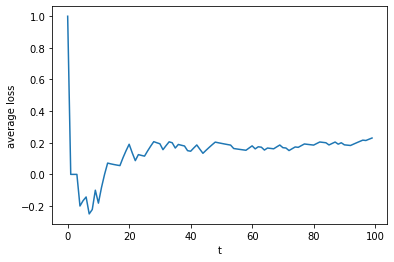

In [72]:
plt.xlabel('t')
plt.ylabel('average loss')
plt.plot(averageloss)
plt.show()